## **SETUP**

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
import os
scaler_input = StandardScaler()
scaler_output = StandardScaler()

# **LOADING DATA**

In [2]:

SteadyState_Input = []

base_path = r'C:\\Users\\ismai\\OneDrive\\Desktop\\CFD Dissertation\\Files\\CSV training\\SteadyCSV'

transient_base_path = r'C:\\Users\\ismai\\OneDrive\\Desktop\\CFD Dissertation\\Files\\CSV training\\ML_OuputMaxV_CSV'

Transient_Output = []
totalNodes = 0

for i in range(1, 41):  # Loop from N1 to N40
    # Construct the steady state file path
    steady_folder_name = f"N{i}Steady"
    steady_file_name = f"N{i}SPVS.csv"
    steady_file_path = os.path.join(base_path, steady_folder_name, steady_file_name)
    
    # Construct the transient file path (assuming a similar naming convention)
    transient_folder_name = f"N{i}"
    transient_file_name = f"N{i}TPV.csv"
    transient_file_path = os.path.join(transient_base_path, transient_folder_name, transient_file_name)

      
    NP = pd.read_csv(steady_file_path)
    NP = NP.replace(' null', 0)
    NPSteady_velocity = NP.iloc[:, 4].values.reshape(-1, 1)
    NPSteady_velocity = scaler_input.fit_transform(NPSteady_velocity)
    SteadyState_Input.append(NPSteady_velocity)

    # Process the transient CSV
    NT = pd.read_csv(transient_file_path)
    NT = NT.replace(' null', 0)
    NPTransient_velocity = NT.iloc[:, 4].values.reshape(-1, 1)
    NPTransient_velocity = scaler_output.fit_transform(NPTransient_velocity)
    Transient_Output.append(NPTransient_velocity)

    # Update the total nodes count and print
    totalNodes += NPSteady_velocity.shape[0]
    print(NPSteady_velocity.shape[0], totalNodes)


2725 2725
3709 6434
6717 13151
4748 17899
6412 24311
3962 28273
4672 32945
6141 39086
2224 41310
2851 44161
3314 47475
2900 50375
3148 53523
3636 57159
4175 61334
3717 65051
6095 71146
5915 77061
5135 82196
4124 86320
5362 91682
2443 94125
4526 98651
6169 104820
2513 107333
5504 112837
5745 118582
3405 121987
5301 127288
5319 132607
6713 139320
2271 141591
2602 144193
6112 150305
4513 154818
6150 160968
2061 163029
3424 166453
7286 173739
4042 177781


# **LSTM**

In [3]:
#https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
#https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
SteadyState_Input_LSTM = np.concatenate(SteadyState_Input)
Transient_Output_LSTM = np.concatenate(Transient_Output)
SteadyState_Input_LSTM_Reshape = SteadyState_Input_LSTM.reshape((SteadyState_Input_LSTM.shape[0], 1, SteadyState_Input_LSTM.shape[1]))
Steady_train, Steady_test, Transient_train, Transient_test = train_test_split(SteadyState_Input_LSTM_Reshape, Transient_Output_LSTM, test_size=0.2, random_state=42)

In [4]:
#https://keras.io/api/layers/core_layers/dense/
#https://keras.io/api/layers/recurrent_layers/lstm/#lstm-layer
#https://keras.io/guides/sequential_model/
#https://keras.io/api/optimizers/
#https://keras.io/api/losses/
#https://github.com/DPCscience/deep-learning-for-GS/blob/master/datacamp_deeplearning.py
#https://keras-contrib.readthedocs.io/en/latest/sources/getting-started/sequential-model-guide/
model = Sequential()
model.add(LSTM(32, input_shape=(Steady_train.shape[1], Steady_train.shape[2]), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(Transient_train.shape[1], activation='linear', return_sequences=False))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [5]:
#https://keras.io/api/layers/core_layers/dense/
#https://keras.io/api/layers/recurrent_layers/lstm/#lstm-layer
#https://keras.io/guides/sequential_model/
#https://keras.io/api/optimizers/
#https://keras.io/api/losses/
#https://github.com/DPCscience/deep-learning-for-GS/blob/master/datacamp_deeplearning.py
#https://keras-contrib.readthedocs.io/en/latest/sources/getting-started/sequential-model-guide/
#https://keras.io/api/models/model_training_apis/#evaluate-method
#https://keras.io/api/models/model_training_apis/#fit-method
model.fit(Steady_train, Transient_train, epochs=5, batch_size=16, validation_split=0.4)
loss, mse = model.evaluate(Steady_test, Transient_test)
print(f"Model performance:\nLoss: {loss}\nMSE: {mse}")

Epoch 1/5
5334/5334 [==============================] - 35s 6ms/step - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.0759 - val_mean_squared_error: 0.0759
Epoch 2/5
5334/5334 [==============================] - 27s 5ms/step - loss: 0.0729 - mean_squared_error: 0.0729 - val_loss: 0.0729 - val_mean_squared_error: 0.0729
Epoch 3/5
5334/5334 [==============================] - 25s 5ms/step - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.0796 - val_mean_squared_error: 0.0796
Epoch 4/5
5334/5334 [==============================] - 24s 4ms/step - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.0715 - val_mean_squared_error: 0.0715
Epoch 5/5
1112/1112 [==============================] - 2s 2ms/step - loss: 0.0745 - mean_squared_error: 0.0745
Model performance:
Loss: 0.07450610399246216
MSE: 0.07450610399246216


# **PREDICTION**

In [123]:
# https://keras.io/api/models/model_training_apis/
SteadyState_New0 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N0\N0SPVS.csv')
SteadyState_New1 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N41\N41SPVS.csv')
SteadyState_New2 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N42\N42SPVS.csv')
SteadyState_New3 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N43\N43SPVS.csv')
SteadyState_New4 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N44\N44SPVS.csv')
SteadyState_New0 = SteadyState_New0.replace(' null', 0)
SteadyState_New1 = SteadyState_New1.replace(' null', 0)
SteadyState_New2 = SteadyState_New2.replace(' null', 0)
SteadyState_New3 = SteadyState_New3.replace(' null', 0)
SteadyState_New4 = SteadyState_New4.replace(' null', 0)
SteadyStateVelocity_0 = SteadyState_New0.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_1 = SteadyState_New1.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_2 = SteadyState_New2.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_3 = SteadyState_New3.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_4 = SteadyState_New4.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_0 = scaler_input.transform(SteadyStateVelocity_0 )
SteadyStateVelocity_1 = scaler_input.transform(SteadyStateVelocity_1 )
SteadyStateVelocity_2 = scaler_input.transform(SteadyStateVelocity_2 )
SteadyStateVelocity_3 = scaler_input.transform(SteadyStateVelocity_3 )
SteadyStateVelocity_4 = scaler_input.transform(SteadyStateVelocity_4 )
SteadyStateVelocity_0 = SteadyStateVelocity_0.reshape((SteadyStateVelocity_0.shape[0], 1, SteadyStateVelocity_0.shape[1]))
SteadyStateVelocity_1 = SteadyStateVelocity_1.reshape((SteadyStateVelocity_1.shape[0], 1, SteadyStateVelocity_1.shape[1]))
SteadyStateVelocity_2 = SteadyStateVelocity_2.reshape((SteadyStateVelocity_2.shape[0], 1, SteadyStateVelocity_2.shape[1]))
SteadyStateVelocity_3 = SteadyStateVelocity_3.reshape((SteadyStateVelocity_3.shape[0], 1, SteadyStateVelocity_3.shape[1]))
SteadyStateVelocity_4 = SteadyStateVelocity_4.reshape((SteadyStateVelocity_4.shape[0], 1, SteadyStateVelocity_4.shape[1]))
Prediction0 = model.predict(SteadyStateVelocity_0)
Prediction1 = model.predict(SteadyStateVelocity_1)
Prediction2 = model.predict(SteadyStateVelocity_2)
Prediction3 = model.predict(SteadyStateVelocity_3)
Prediction4 = model.predict(SteadyStateVelocity_4)
Prediction0 = scaler_output.inverse_transform(Prediction0)
Prediction1 = scaler_output.inverse_transform(Prediction1)
Prediction2 = scaler_output.inverse_transform(Prediction2)
Prediction3 = scaler_output.inverse_transform(Prediction3)
Prediction4 = scaler_output.inverse_transform(Prediction4)
SteadyState_New0 ['Transient Prediction 0'] = Prediction0
SteadyState_New1 ['Transient Prediction 1'] = Prediction1
SteadyState_New2 ['Transient Prediction 2'] = Prediction2
SteadyState_New3 ['Transient Prediction 3'] = Prediction3
SteadyState_New4 ['Transient Prediction 4'] = Prediction4
print(Prediction0)
print(Prediction1)
print(Prediction2)
print(Prediction3)
print(Prediction4)
SteadyState_New0.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N0P.csv', index=False)
SteadyState_New1.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N41P.csv', index=False)
SteadyState_New2.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N42P.csv', index=False)
SteadyState_New3.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N43P.csv', index=False)
SteadyState_New4.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N44P.csv', index=False)


161/161 [==============================] - 0s 2ms/step
[[0.45566893]
 [0.45998606]
 [0.45422888]
 ...
 [0.29417363]
 [0.24825358]
 [0.20520502]]
[[0.61704624]
 [0.45998606]
 [0.48009992]
 ...
 [0.19682257]
 [0.11396956]
 [0.02258214]]
[[0.48009992]
 [0.48009992]
 [0.48153567]
 ...
 [0.02258213]
 [0.02258213]
 [0.02258213]]
[[0.5420642 ]
 [0.5362645 ]
 [0.4671743 ]
 ...
 [0.02258214]
 [0.02258214]
 [0.02258214]]
[[0.5435157 ]
 [0.5333684 ]
 [0.5464207 ]
 ...
 [0.02258213]
 [0.02258213]
 [0.1474588 ]]


# **RESULTS N0**

In [124]:
PredictedTransient0 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N0P.csv')
# Print column names
print(PredictedTransient0.columns)
PredictedTransient0 = PredictedTransient0.fillna(0)
PredictedTransient0 = PredictedTransient0.replace(' null', np.nan)
x = PredictedTransient0[' X [ m ]']
z = PredictedTransient0[' Z [ m ]']
ste_velocity = PredictedTransient0[' Velocity [ m s^-1 ]']
velocity = PredictedTransient0['Transient Prediction 0']
diff_ste = PredictedTransient0['Transient Prediction 0'] - PredictedTransient0[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 0'],
      dtype='object')


In [126]:
CFDTransient0 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N0TMAX\N0TV.csv')
print(CFDTransient0.columns)
CFDTransient0 = CFDTransient0.fillna(0)
CFDTransient0 = CFDTransient0.replace(' null', np.nan)
x = CFDTransient0 [' X [ m ]']
z = CFDTransient0 [' Z [ m ]']
velocity_truth = CFDTransient0 [' Velocity [ m s^-1 ]']
diff_vel = PredictedTransient0['Transient Prediction 0'] - CFDTransient0[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


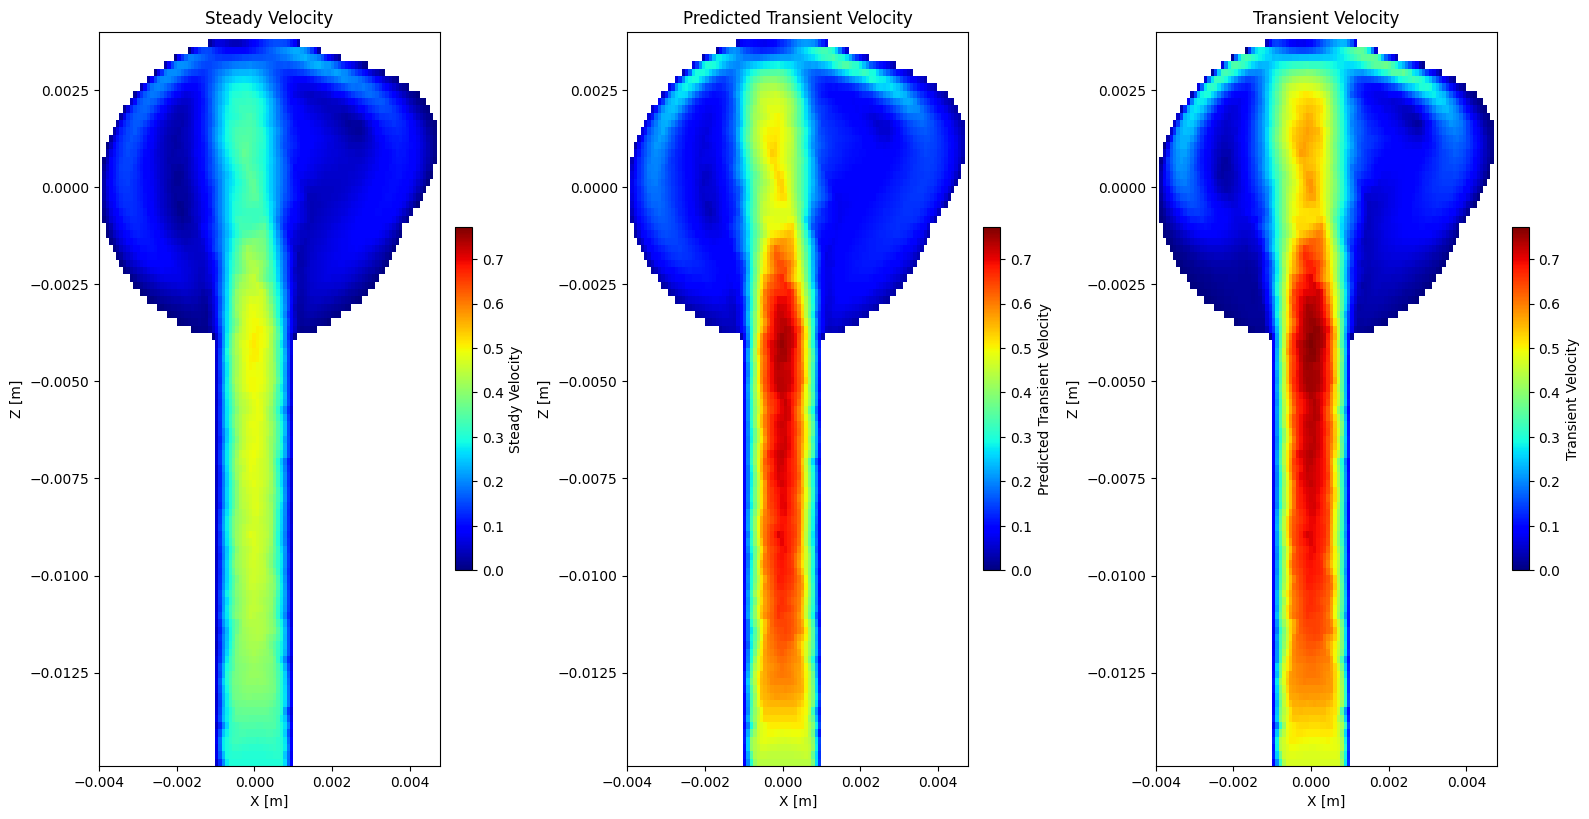

In [127]:
# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Generate heat maps for velocity
#plt.subplot(1, 1, 1)
fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(16, 26))
fig.patch.set_facecolor('white')

im0 = ax0.imshow(masked_velocity0.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im0, ax=ax0, label='Steady Velocity',fraction=0.046, pad=0.04)
ax0.set_title('Steady Velocity')
ax0.set_xlabel("X [m]")
ax0.set_ylabel("Z [m]")
im1 = ax1.imshow(masked_velocity1.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.046, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Z [m]")
im2 = ax2.imshow(masked_velocity2.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.046, pad=0.04)
ax2.set_title('Transient Velocity')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Z [m]")

# Save the figure to a file with 600x600 pixels

plt.tight_layout()
plt.show()

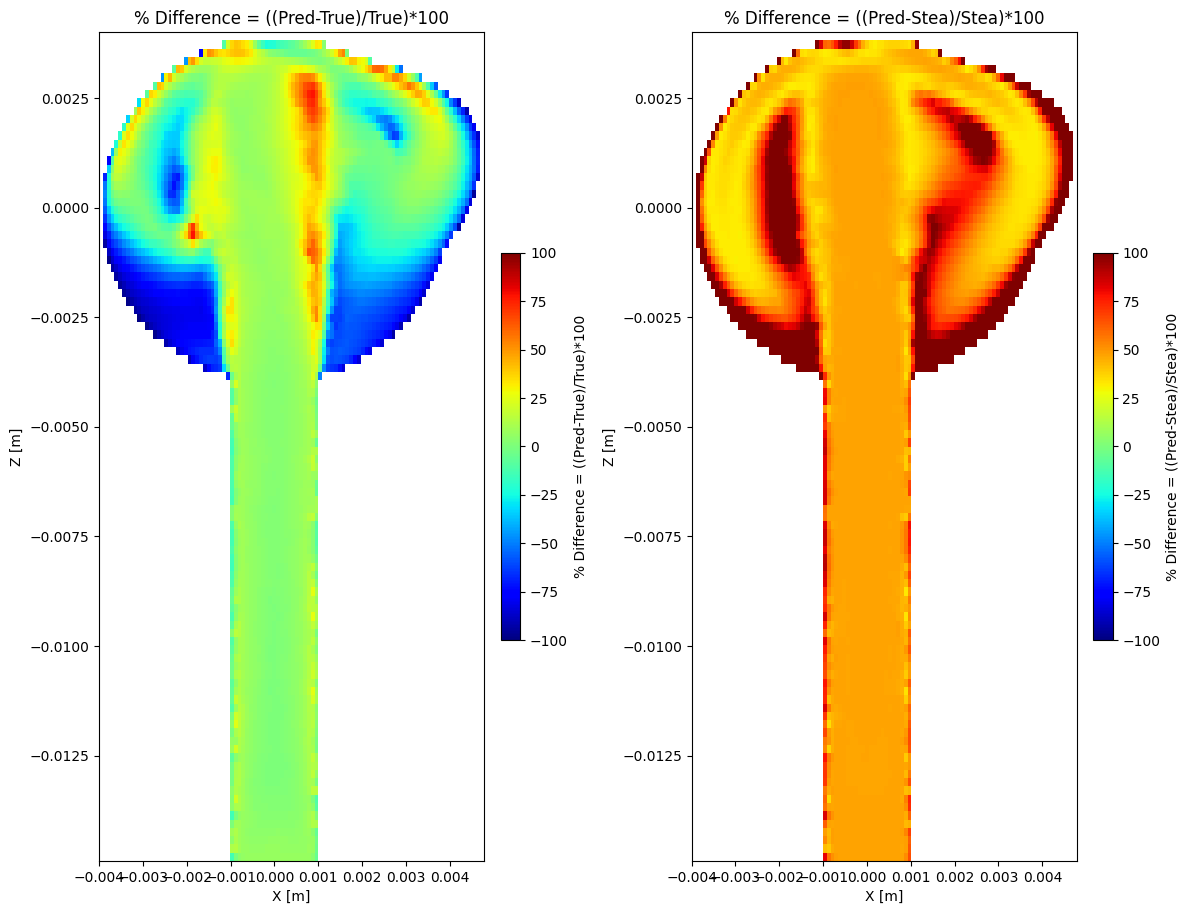

In [128]:
# Calculate percentage differences
percentage_change3 = ((masked_velocity2 - masked_velocity1) / masked_velocity1) * 100
percentage_change4 = ((masked_velocity1 - masked_velocity0) / masked_velocity0) * 100

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 12))
fig.patch.set_facecolor('white')

# Heatmap for percentage difference between predicted transient and transient truth
im3 = ax3.imshow(percentage_change3.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='% Difference = ((Pred-True)/True)*100', fraction=0.046, pad=0.04)
ax3.set_title('% Difference = ((Pred-True)/True)*100')
ax3.set_xlabel("X [m]")
ax3.set_ylabel("Z [m]")

# Heatmap for percentage difference between predicted transient and steady velocity
im4 = ax4.imshow(percentage_change4.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='% Difference = ((Pred-Stea)/Stea)*100', fraction=0.046, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("X [m]")
ax4.set_ylabel("Z [m]")

plt.tight_layout()
plt.show()


In [129]:
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

average_percentage_change3, average_percentage_change4

(20.43937009350582, 68.11664825612898)

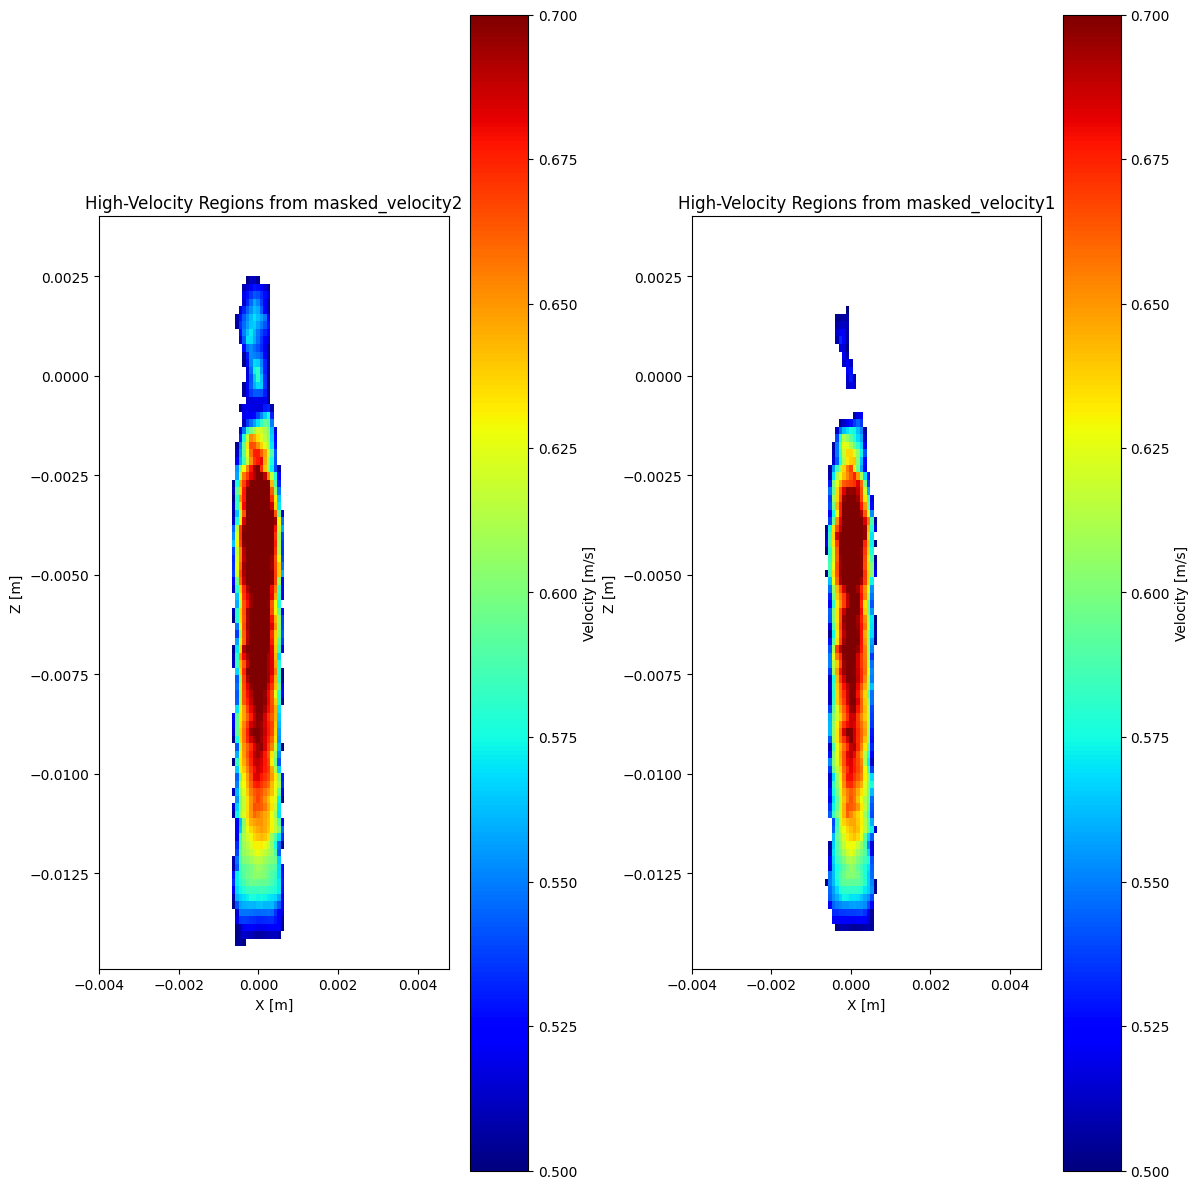

In [130]:

# Create masks for high-velocity regions
mask_high_velocity2 = (masked_velocity2 >= 0.5) & (masked_velocity2 <= 0.8)
mask_high_velocity1 = (masked_velocity1 >= 0.5) & (masked_velocity1 <= 0.8)

# Apply masks to velocities
masked_values2 = np.where(mask_high_velocity2, masked_velocity2, np.nan)
masked_values1 = np.where(mask_high_velocity1, masked_velocity1, np.nan)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
fig.patch.set_facecolor('white')

# Heatmap for masked_velocity2
im1 = ax1.imshow(masked_values2.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=0.5, vmax=0.7)
fig.colorbar(im1, ax=ax1, label='Velocity [m/s]')
ax1.set_title('High-Velocity Regions from masked_velocity2')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Z [m]")

# Heatmap for masked_velocity1
im2 = ax2.imshow(masked_values1.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=0.5, vmax=0.7)
fig.colorbar(im2, ax=ax2, label='Velocity [m/s]')
ax2.set_title('High-Velocity Regions from masked_velocity1')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Z [m]")

plt.tight_layout()
plt.show()


MODEL PERFORMANCE CHECK (PREDICTION VS RESULTS)

In [131]:
max_velocity = np.max(Prediction0)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient0[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")

relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient0[' Velocity [ m s^-1 ]'], Prediction0)
print(r2)

Maximum velocity from the prediction is: 0.7558922171592712
Maximum velocity from the actual is: 0.773
% is: 2.213167249770864
0.9653423398626078


# **RESULTS N41**

In [105]:
PredictedTransient1 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N41P.csv')
# Print column names
print(PredictedTransient1.columns)
PredictedTransient1 = PredictedTransient1.fillna(0)
PredictedTransient1 = PredictedTransient1.replace(' null', np.nan)
x = PredictedTransient1[' X [ m ]']
z = PredictedTransient1[' Z [ m ]']
ste_velocity1 = PredictedTransient1[' Velocity [ m s^-1 ]']
velocity1 = PredictedTransient1['Transient Prediction 1']
diff_ste1 = PredictedTransient1['Transient Prediction 1'] - PredictedTransient1[' Velocity [ m s^-1 ]']

CFDTransient1 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N41Tmax\N41TV.csv')
print(CFDTransient1.columns)
CFDTransient1 = CFDTransient1.fillna(0)
CFDTransient1 = CFDTransient1.replace(' null', np.nan)
x = CFDTransient1 [' X [ m ]']
z = CFDTransient1 [' Z [ m ]']
velocity_truth1 = CFDTransient1 [' Velocity [ m s^-1 ]']
diff_vel1 = PredictedTransient1['Transient Prediction 1'] - CFDTransient1[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 1'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


In [106]:
print(np.array(x).shape)
print(np.array(z).shape)
print(np.array(ste_velocity).shape)
print(np.array(velocity).shape)
print(np.array(velocity_truth).shape)

(1891,)
(1891,)
(1891,)
(1891,)
(1891,)


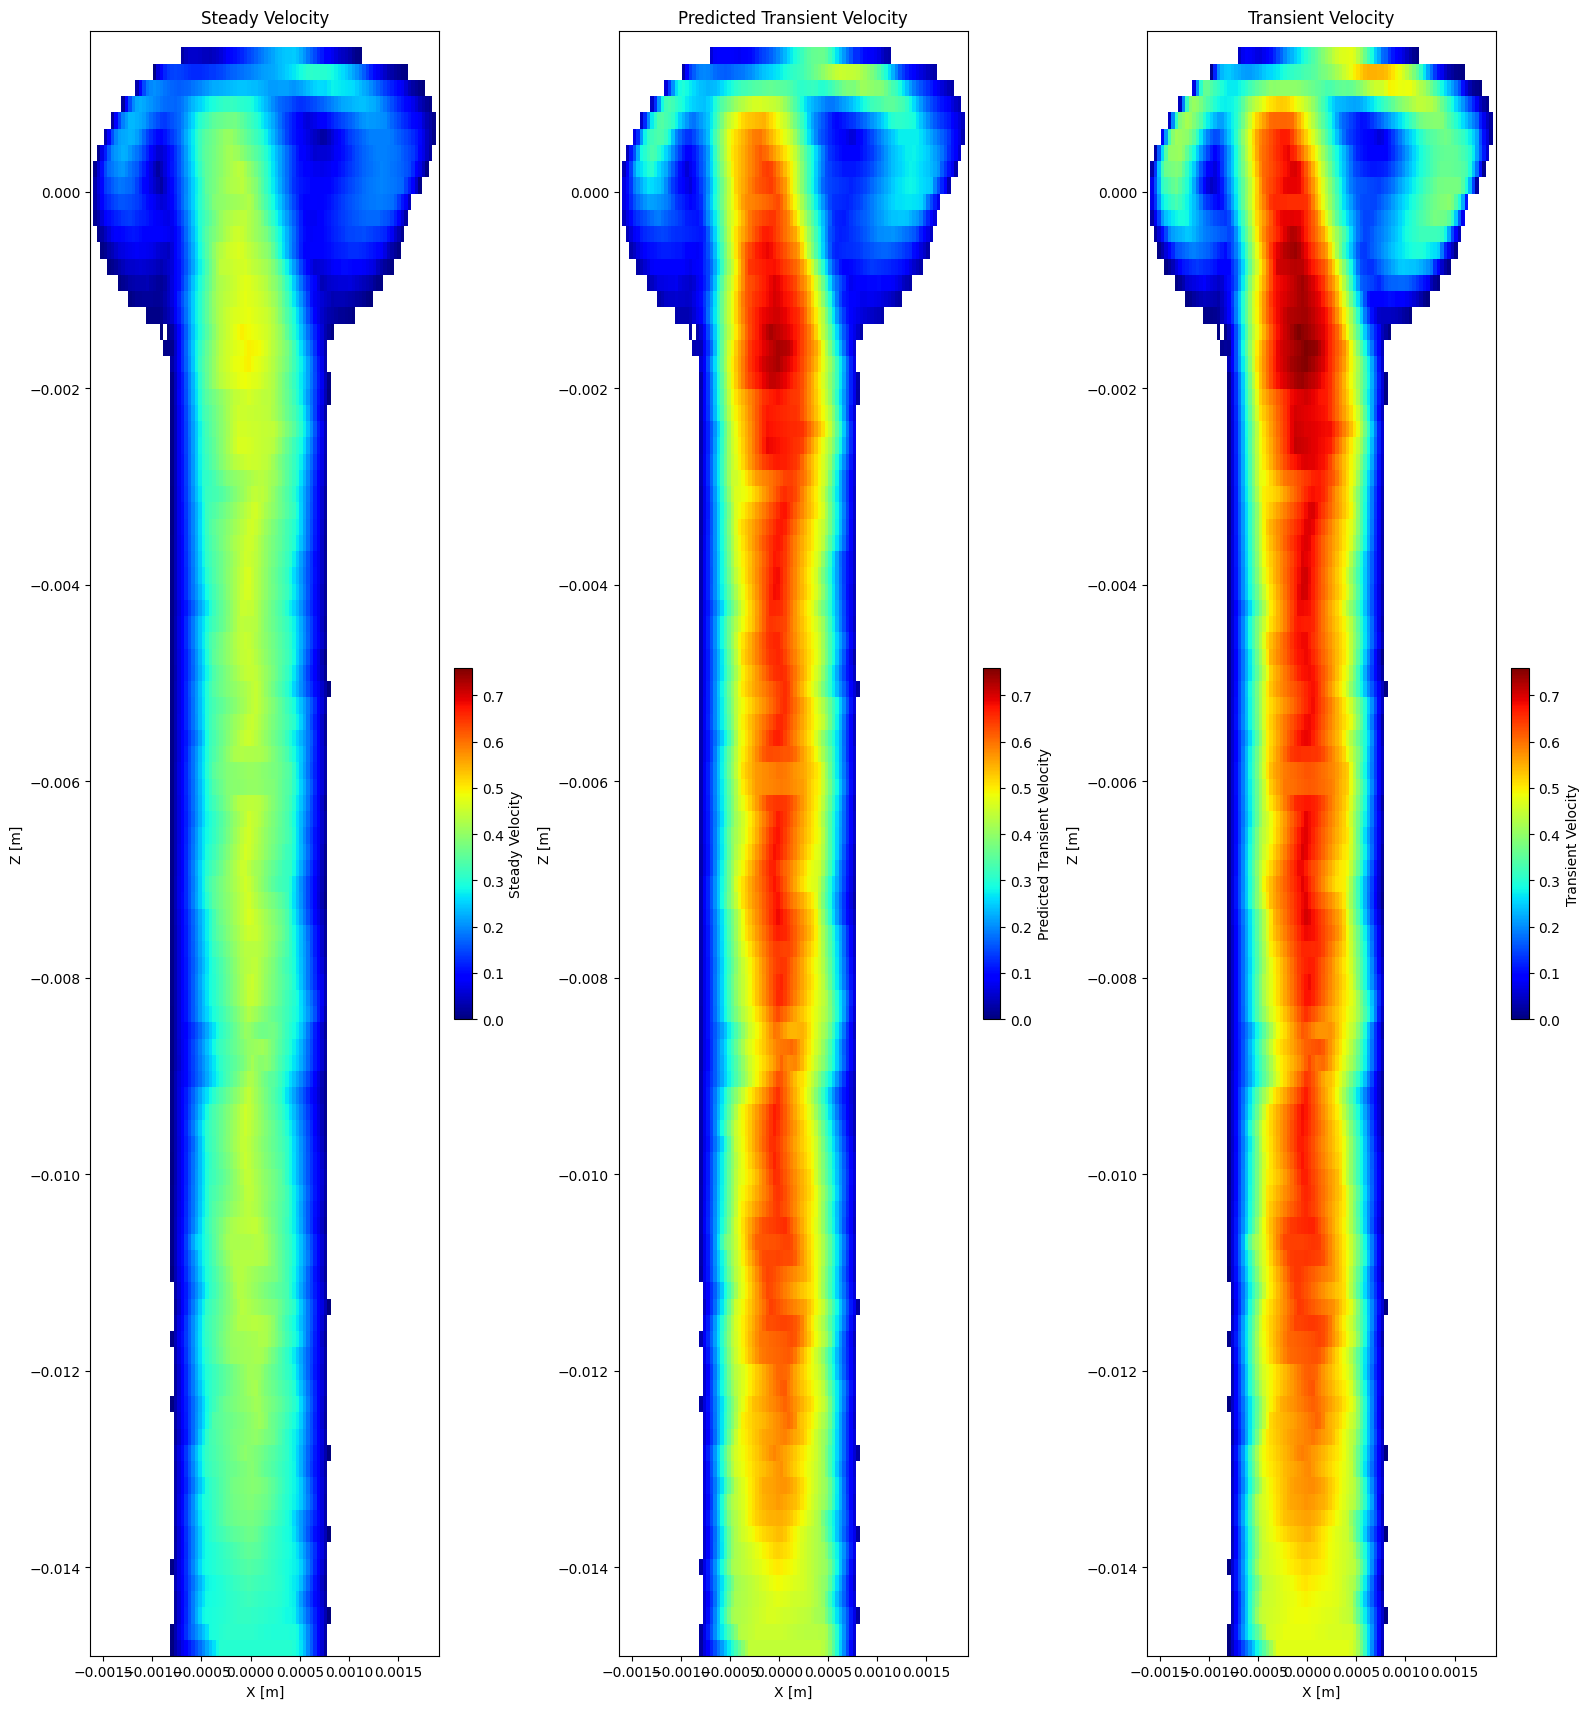

In [111]:
# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity1, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity1, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth1, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel1, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste1, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Generate heat maps for velocity
#plt.subplot(1, 1, 1)
fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(16, 26))
fig.patch.set_facecolor('white')

im0 = ax0.imshow(masked_velocity0.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im0, ax=ax0, label='Steady Velocity',fraction=0.046, pad=0.04)
ax0.set_title('Steady Velocity')
ax0.set_xlabel("X [m]")
ax0.set_ylabel("Z [m]")
im1 = ax1.imshow(masked_velocity1.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.046, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Z [m]")
im2 = ax2.imshow(masked_velocity2.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.046, pad=0.04)
ax2.set_title('Transient Velocity')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Z [m]")

# Save the figure to a file with 600x600 pixels

plt.tight_layout()
plt.show()

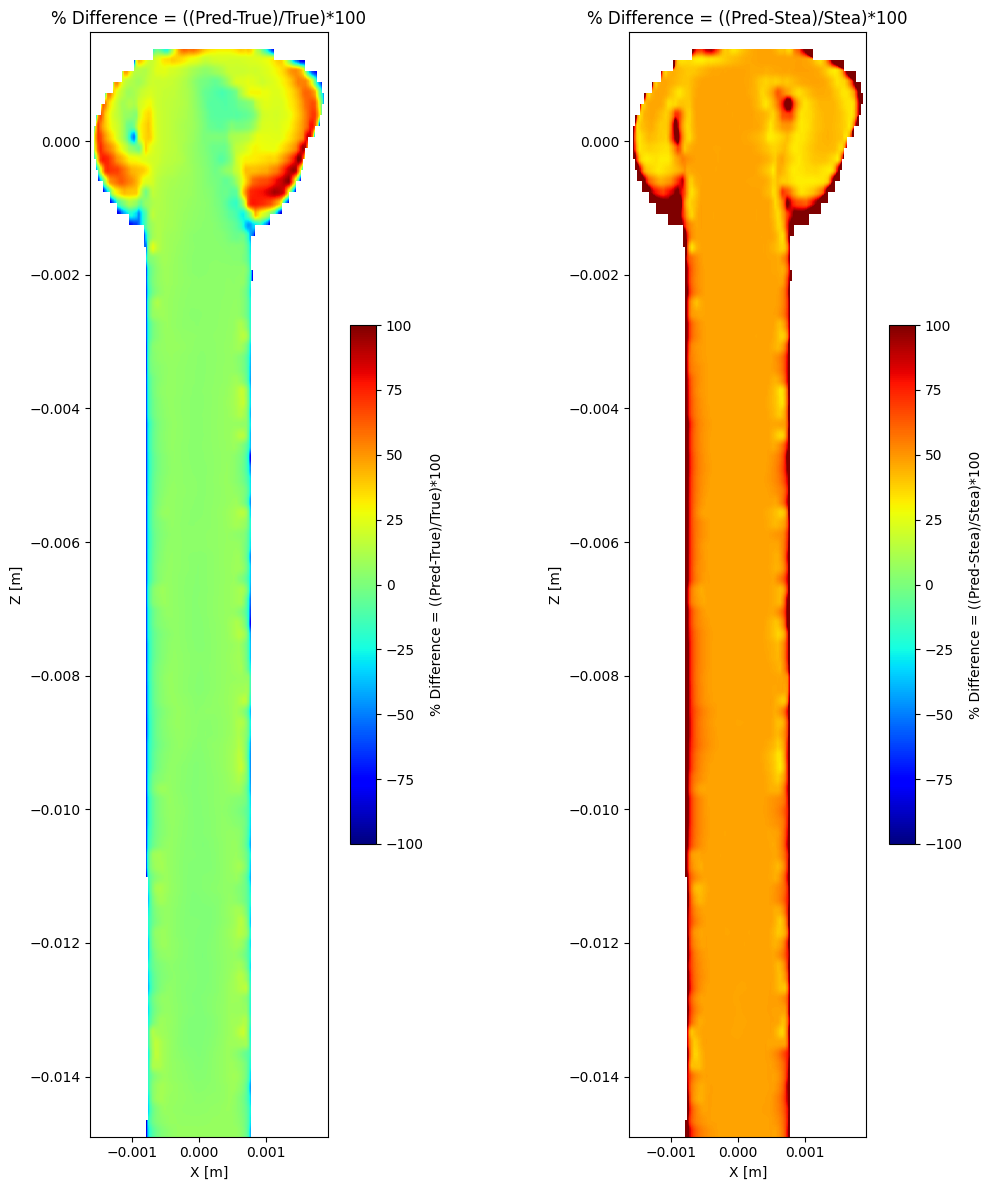

In [89]:
# Calculate percentage differences
percentage_change3 = ((masked_velocity2 - masked_velocity1) / masked_velocity1) * 100
percentage_change4 = ((masked_velocity1 - masked_velocity0) / masked_velocity0) * 100

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 12))
fig.patch.set_facecolor('white')

# Heatmap for percentage difference between predicted transient and transient truth
im3 = ax3.imshow(percentage_change3.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='% Difference = ((Pred-True)/True)*100', fraction=0.046, pad=0.04)
ax3.set_title('% Difference = ((Pred-True)/True)*100')
ax3.set_xlabel("X [m]")
ax3.set_ylabel("Z [m]")

# Heatmap for percentage difference between predicted transient and steady velocity
im4 = ax4.imshow(percentage_change4.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='% Difference = ((Pred-Stea)/Stea)*100', fraction=0.046, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("X [m]")
ax4.set_ylabel("Z [m]")

plt.tight_layout()
plt.show()


In [121]:
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

print(average_percentage_change3, 'and', average_percentage_change4)

max_velocity = np.max(Prediction1)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient1[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")

relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient1[' Velocity [ m s^-1 ]'], Prediction1)
print(r2)

18.484674661547277 and 68.61211917320642
Maximum velocity from the prediction is: 0.733221709728241
Maximum velocity from the actual is: 0.761
% is: 3.650235252530755
0.941306542287004


# **RESULTS N42**

In [132]:
PredictedTransient2 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N42P.csv')
# Print column names
print(PredictedTransient2.columns)
PredictedTransient2 = PredictedTransient2.fillna(0)
PredictedTransient2 = PredictedTransient2.replace(' null', np.nan)
x = PredictedTransient2[' X [ m ]']
z = PredictedTransient2[' Z [ m ]']
ste_velocity2 = PredictedTransient2[' Velocity [ m s^-1 ]']
velocity2 = PredictedTransient2['Transient Prediction 2']
diff_ste2 = PredictedTransient2['Transient Prediction 2'] - PredictedTransient1[' Velocity [ m s^-1 ]']
CFDTransient2 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N42Tmax\N42TV.csv')
print(CFDTransient2.columns)
CFDTransient2 = CFDTransient2.fillna(0)
CFDTransient2 = CFDTransient2.replace(' null', np.nan)
x = CFDTransient2 [' X [ m ]']
z = CFDTransient2 [' Z [ m ]']
velocity_truth2 = CFDTransient2 [' Velocity [ m s^-1 ]']
diff_vel2 = PredictedTransient2['Transient Prediction 2'] - CFDTransient2[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 2'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


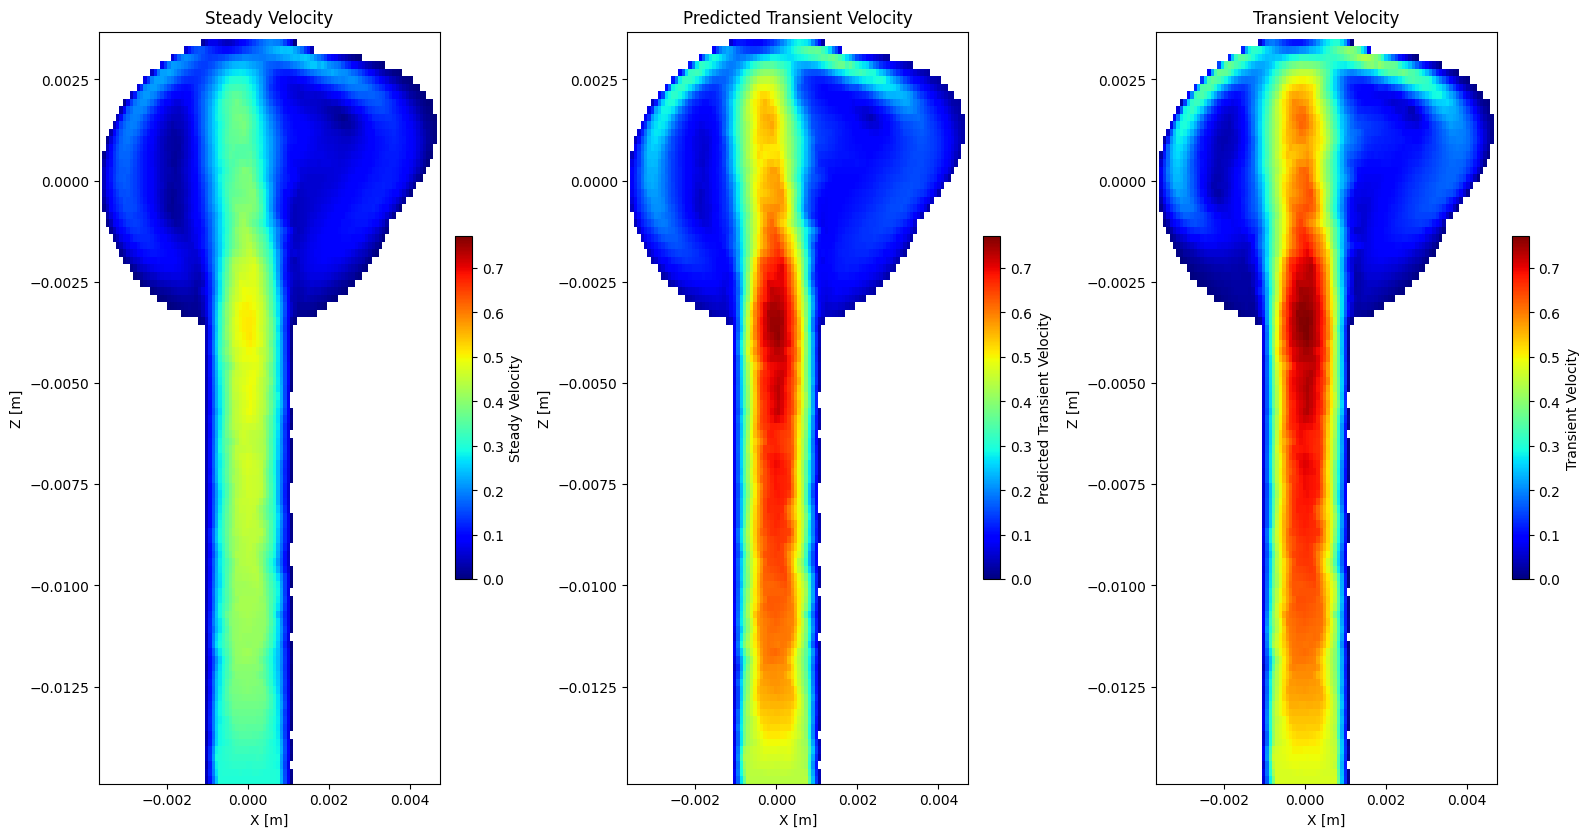

In [133]:
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]
grid_velocity0 = griddata((x, z), ste_velocity2, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity2, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth2, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel2, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste2, (grid_x, grid_z), method='linear', fill_value=np.nan)
cmap = plt.cm.jet 
cmap.set_bad(color='white')  
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)
fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(16, 26))
fig.patch.set_facecolor('white')
im0 = ax0.imshow(masked_velocity0.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im0, ax=ax0, label='Steady Velocity',fraction=0.046, pad=0.04)
ax0.set_title('Steady Velocity')
ax0.set_xlabel("X [m]")
ax0.set_ylabel("Z [m]")
im1 = ax1.imshow(masked_velocity1.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.046, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Z [m]")
im2 = ax2.imshow(masked_velocity2.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.046, pad=0.04)
ax2.set_title('Transient Velocity')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Z [m]")
plt.tight_layout()
plt.show()

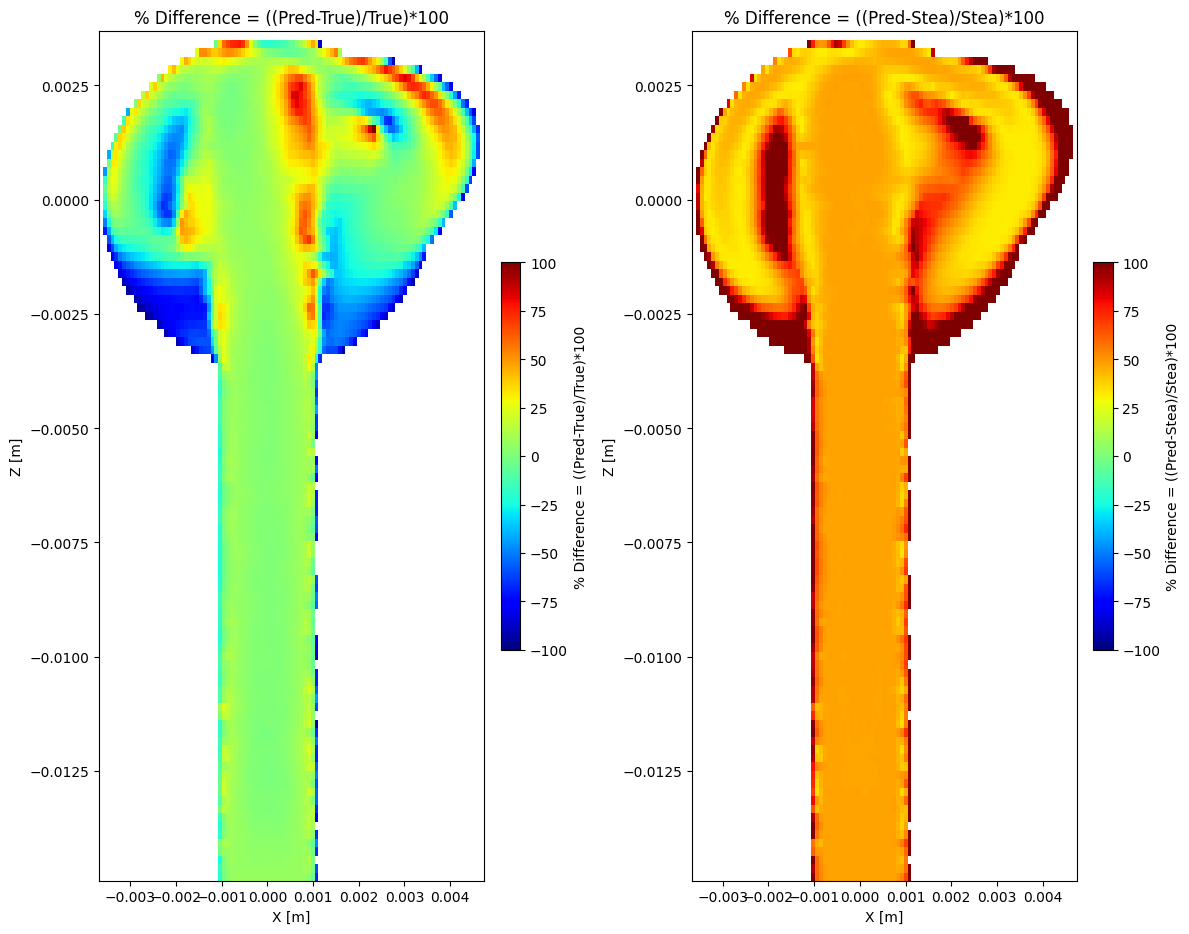

In [134]:
# Calculate percentage differences
percentage_change3 = ((masked_velocity2 - masked_velocity1) / masked_velocity1) * 100
percentage_change4 = ((masked_velocity1 - masked_velocity0) / masked_velocity0) * 100

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 12))
fig.patch.set_facecolor('white')

# Heatmap for percentage difference between predicted transient and transient truth
im3 = ax3.imshow(percentage_change3.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='% Difference = ((Pred-True)/True)*100', fraction=0.046, pad=0.04)
ax3.set_title('% Difference = ((Pred-True)/True)*100')
ax3.set_xlabel("X [m]")
ax3.set_ylabel("Z [m]")

# Heatmap for percentage difference between predicted transient and steady velocity
im4 = ax4.imshow(percentage_change4.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='% Difference = ((Pred-Stea)/Stea)*100', fraction=0.046, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("X [m]")
ax4.set_ylabel("Z [m]")

plt.tight_layout()
plt.show()

In [135]:
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

print(average_percentage_change3, 'and', average_percentage_change4)

max_velocity = np.max(Prediction2)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient2[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")

relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient2[' Velocity [ m s^-1 ]'], Prediction2)
print(r2)

18.484674661547277 and 68.61211917320642
Maximum velocity from the prediction is: 0.7619187831878662
Maximum velocity from the actual is: 0.774
% is: 1.5608807250818877
0.9593315828358274


In [ ]:
# Create masks for high-velocity regions
mask_high_velocity2 = (masked_velocity2 >= 0.5) & (masked_velocity2 <= 0.8)
mask_high_velocity1 = (masked_velocity1 >= 0.5) & (masked_velocity1 <= 0.8)

# Apply masks to velocities
masked_values2 = np.where(mask_high_velocity2, masked_velocity2, np.nan)
masked_values1 = np.where(mask_high_velocity1, masked_velocity1, np.nan)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
fig.patch.set_facecolor('white')

# Heatmap for masked_velocity2
im1 = ax1.imshow(masked_values2.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=0.5, vmax=0.7)
fig.colorbar(im1, ax=ax1, label='Velocity [m/s]')
ax1.set_title('High-Velocity Regions from masked_velocity2')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Z [m]")

# Heatmap for masked_velocity1
im2 = ax2.imshow(masked_values1.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=0.5, vmax=0.7)
fig.colorbar(im2, ax=ax2, label='Velocity [m/s]')
ax2.set_title('High-Velocity Regions from masked_velocity1')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Z [m]")

plt.tight_layout()
plt.show()


# **RESULTS N43**

In [136]:
PredictedTransient3 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N43P.csv')
# Print column names
print(PredictedTransient3.columns)
PredictedTransient3 = PredictedTransient3.fillna(0)
PredictedTransient3 = PredictedTransient3.replace(' null', np.nan)
x = PredictedTransient3[' X [ m ]']
z = PredictedTransient3[' Z [ m ]']
ste_velocity3 = PredictedTransient3[' Velocity [ m s^-1 ]']
velocity3 = PredictedTransient3['Transient Prediction 3']
diff_ste3 = PredictedTransient3['Transient Prediction 3'] - PredictedTransient3[' Velocity [ m s^-1 ]']

CFDTransient3 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N43Tmax\N43TV.csv')
print(CFDTransient3.columns)
CFDTransient3 = CFDTransient3.fillna(0)
CFDTransient3 = CFDTransient3.replace(' null', np.nan)
x = CFDTransient3 [' X [ m ]']
z = CFDTransient3 [' Z [ m ]']
velocity_truth3 = CFDTransient3 [' Velocity [ m s^-1 ]']
diff_vel3 = PredictedTransient3['Transient Prediction 3'] - CFDTransient3[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 3'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


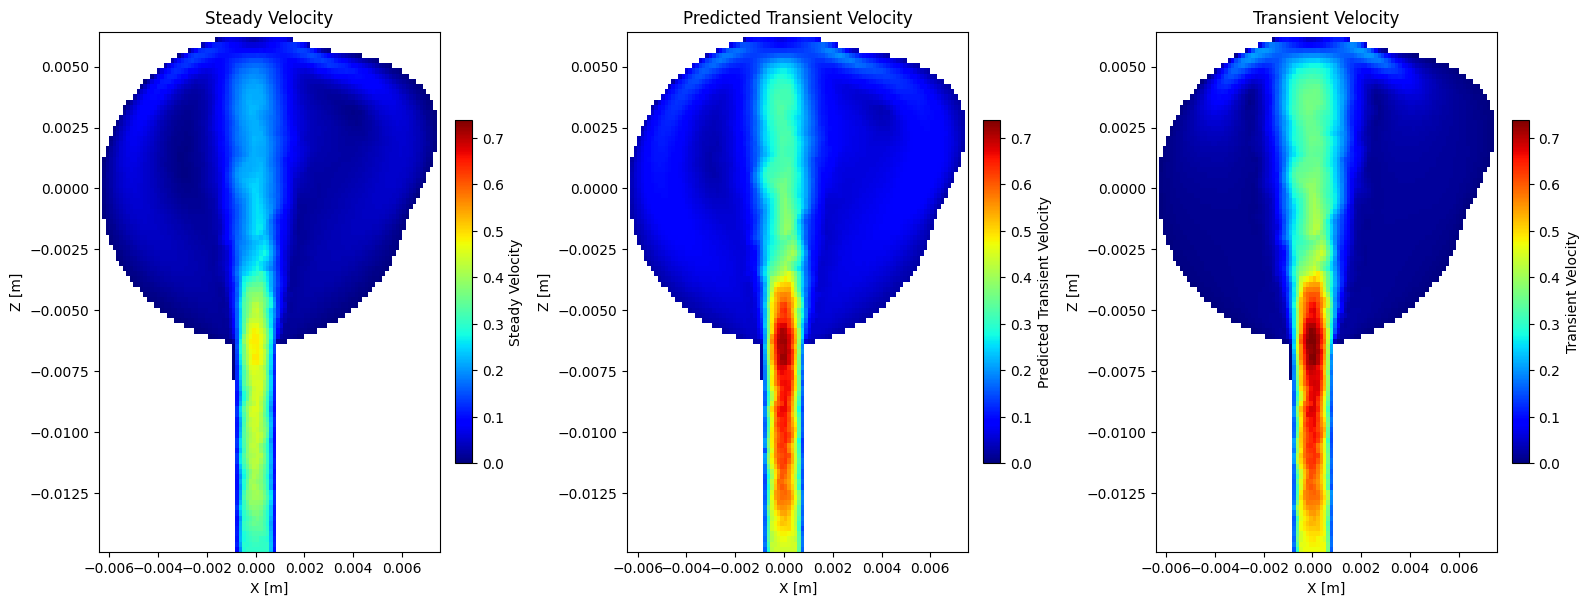

In [139]:
# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity3, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity3, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth3, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel3, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste3, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Generate heat maps for velocity
#plt.subplot(1, 1, 1)
fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(16, 26))
fig.patch.set_facecolor('white')

im0 = ax0.imshow(masked_velocity0.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im0, ax=ax0, label='Steady Velocity',fraction=0.046, pad=0.04)
ax0.set_title('Steady Velocity')
ax0.set_xlabel("X [m]")
ax0.set_ylabel("Z [m]")
im1 = ax1.imshow(masked_velocity1.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.046, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Z [m]")
im2 = ax2.imshow(masked_velocity2.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.046, pad=0.04)
ax2.set_title('Transient Velocity')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Z [m]")

# Save the figure to a file with 600x600 pixels

plt.tight_layout()
plt.show()

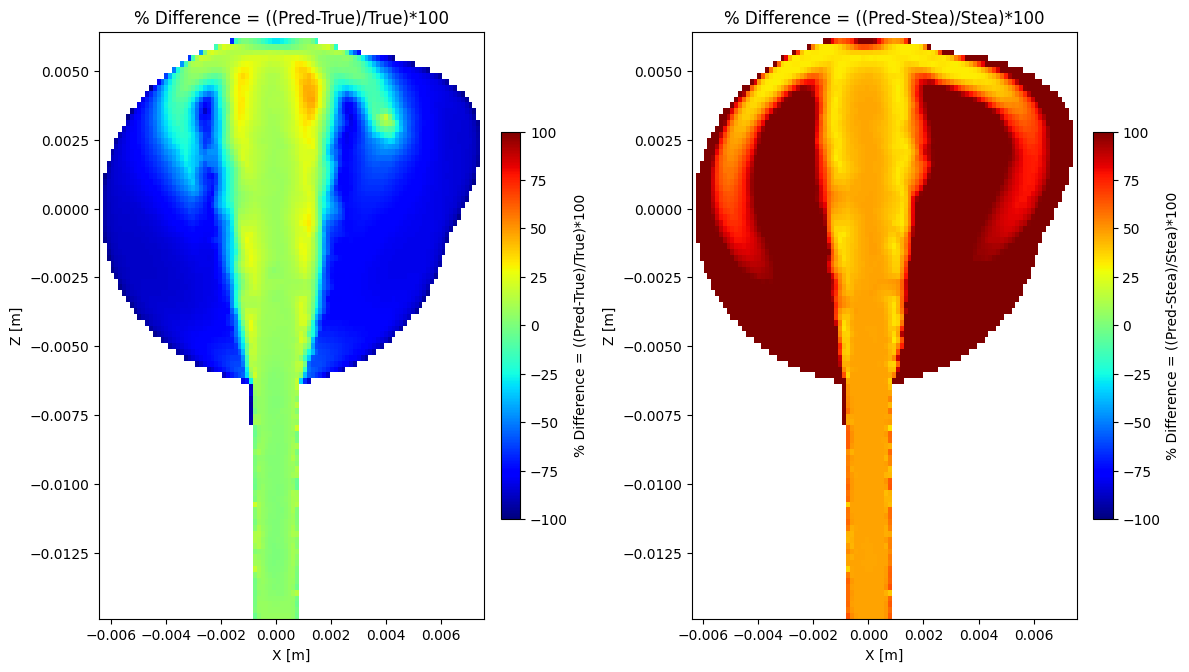

In [148]:
# Calculate percentage differences
percentage_change3 = ((masked_velocity2 - masked_velocity1) / masked_velocity1) * 100
percentage_change4 = ((masked_velocity1 - masked_velocity0) / masked_velocity0) * 100

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 12))
fig.patch.set_facecolor('white')

# Heatmap for percentage difference between predicted transient and transient truth
im3 = ax3.imshow(percentage_change3.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='% Difference = ((Pred-True)/True)*100', fraction=0.046, pad=0.04)
ax3.set_title('% Difference = ((Pred-True)/True)*100')
ax3.set_xlabel("X [m]")
ax3.set_ylabel("Z [m]")

# Heatmap for percentage difference between predicted transient and steady velocity
im4 = ax4.imshow(percentage_change4.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='% Difference = ((Pred-Stea)/Stea)*100', fraction=0.046, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("X [m]")
ax4.set_ylabel("Z [m]")

plt.tight_layout()
plt.show()

In [150]:
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

print(average_percentage_change3, 'and', average_percentage_change4)

max_velocity = np.max(Prediction3)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity3 = CFDTransient3[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")

relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient3[' Velocity [ m s^-1 ]'], Prediction3)
print(r2)

46.458174730219525 and 127.74066998799807
Maximum velocity from the prediction is: 0.7271631360054016
Maximum velocity from the actual is: 0.774
% is: 6.051274417906772
0.9286586700776185


# **RESULTS N44**

In [153]:
PredictedTransient4 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N44P.csv')
# Print column names
print(PredictedTransient4.columns)
PredictedTransient4 = PredictedTransient4.fillna(0)
PredictedTransient4 = PredictedTransient4.replace(' null', np.nan)
x = PredictedTransient4[' X [ m ]']
z = PredictedTransient4[' Z [ m ]']
ste_velocity4 = PredictedTransient4[' Velocity [ m s^-1 ]']
velocity4 = PredictedTransient4['Transient Prediction 4']
diff_ste4 = PredictedTransient4['Transient Prediction 4'] - PredictedTransient4[' Velocity [ m s^-1 ]']

CFDTransient4 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N44Tmax\N44TV.csv')
print(CFDTransient4.columns)
CFDTransient4 = CFDTransient4.fillna(0)
CFDTransient4 = CFDTransient4.replace(' null', np.nan)
x = CFDTransient4 [' X [ m ]']
z = CFDTransient4 [' Z [ m ]']
velocity_truth4 = CFDTransient4 [' Velocity [ m s^-1 ]']
diff_vel4 = PredictedTransient4['Transient Prediction 4'] - CFDTransient4[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 4'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


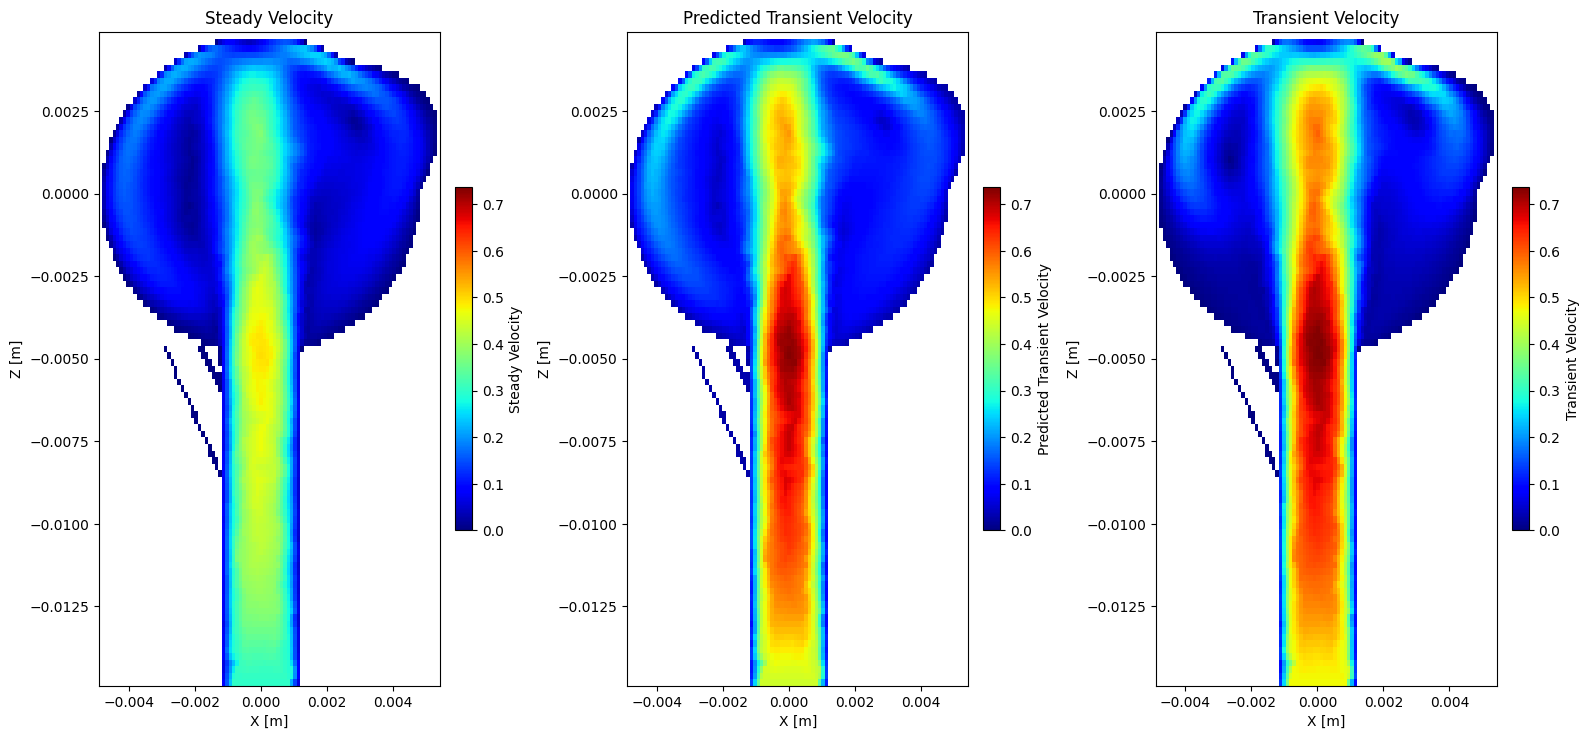

In [154]:
# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity4, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity4, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth4, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel4, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste4, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Generate heat maps for velocity
#plt.subplot(1, 1, 1)
fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(16, 26))
fig.patch.set_facecolor('white')

im0 = ax0.imshow(masked_velocity0.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im0, ax=ax0, label='Steady Velocity',fraction=0.046, pad=0.04)
ax0.set_title('Steady Velocity')
ax0.set_xlabel("X [m]")
ax0.set_ylabel("Z [m]")
im1 = ax1.imshow(masked_velocity1.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.046, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Z [m]")
im2 = ax2.imshow(masked_velocity2.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.046, pad=0.04)
ax2.set_title('Transient Velocity')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Z [m]")

# Save the figure to a file with 600x600 pixels

plt.tight_layout()
plt.show()

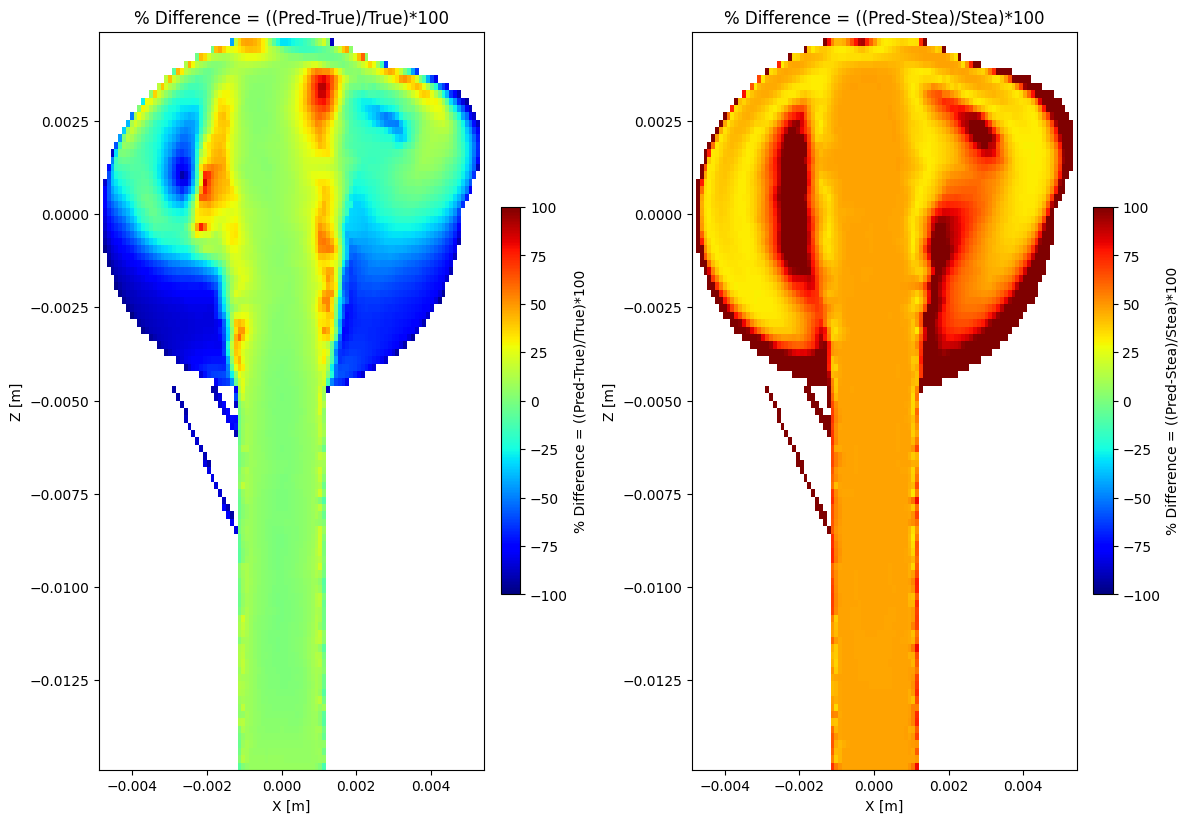

In [155]:
# Calculate percentage differences
percentage_change3 = ((masked_velocity2 - masked_velocity1) / masked_velocity1) * 100
percentage_change4 = ((masked_velocity1 - masked_velocity0) / masked_velocity0) * 100

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 12))
fig.patch.set_facecolor('white')

# Heatmap for percentage difference between predicted transient and transient truth
im3 = ax3.imshow(percentage_change3.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='% Difference = ((Pred-True)/True)*100', fraction=0.046, pad=0.04)
ax3.set_title('% Difference = ((Pred-True)/True)*100')
ax3.set_xlabel("X [m]")
ax3.set_ylabel("Z [m]")

# Heatmap for percentage difference between predicted transient and steady velocity
im4 = ax4.imshow(percentage_change4.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='% Difference = ((Pred-Stea)/Stea)*100', fraction=0.046, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("X [m]")
ax4.set_ylabel("Z [m]")

plt.tight_layout()
plt.show()

In [158]:
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

print(average_percentage_change3, 'and', average_percentage_change4)

max_velocity = np.max(Prediction4)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient4[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")

relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score(CFDTransient4[' Velocity [ m s^-1 ]'], Prediction4)
print(r2)

25.729728824467227 and 76.67384816863596
Maximum velocity from the prediction is: 0.7317075729370117
Maximum velocity from the actual is: 0.737
% is: 0.718104079102886
0.9389245843648838
